In [2]:
# Required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

##### ====================== 1. DATA PREPARATION ======================

In [3]:
# Let's use a simple dataset: predicting student exam scores based on
# hours of study and hours of sleep

print("Step 1: Data Preparation")
print("------------------------")

# Input data: [hours_studied, hours_slept]
X = np.array([[3, 5],    # Student 1: 3 hours study, 5 hours sleep
              [5, 1],    # Student 2: 5 hours study, 1 hour sleep
              [10, 2]])  # Student 3: 10 hours study, 2 hours sleep

# Output data: [exam_score]
y = np.array([[75],      # Student 1 score: 75%
              [82],      # Student 2 score: 82%
              [93]])     # Student 3 score: 93%

print(f"Input data (hours studied, hours slept):\n{X}")
print(f"Output data (exam scores):\n{y}")

Step 1: Data Preparation
------------------------
Input data (hours studied, hours slept):
[[ 3  5]
 [ 5  1]
 [10  2]]
Output data (exam scores):
[[75]
 [82]
 [93]]


In [4]:
# Normalization: Scale inputs and outputs for better training
# This is essential as it helps the network converge faster
X_norm = X / np.max(X, axis=0)  # Normalize each column by its maximum value
y_norm = y / 100.0              # Scale scores to be between 0 and 1

print("\nNormalized input data:")
print(X_norm)
print("Normalized output data:")
print(y_norm)


Normalized input data:
[[0.3 1. ]
 [0.5 0.2]
 [1.  0.4]]
Normalized output data:
[[0.75]
 [0.82]
 [0.93]]


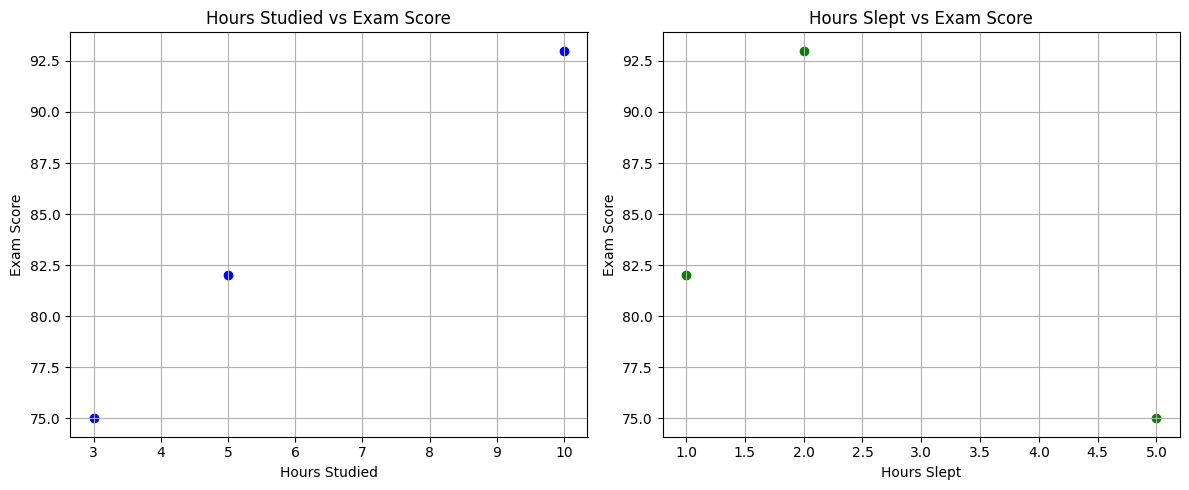

In [5]:
# Visualize our training data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], y, c='blue', label='Hours Studied vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Hours Studied vs Exam Score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 1], y, c='green', label='Hours Slept vs Score')
plt.xlabel('Hours Slept')
plt.ylabel('Exam Score')
plt.title('Hours Slept vs Exam Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
0.1 - 0.0001

##### ====================== 2. NEURAL NETWORK ARCHITECTURE ======================


Step 2: Neural Network Architecture
----------------------------------


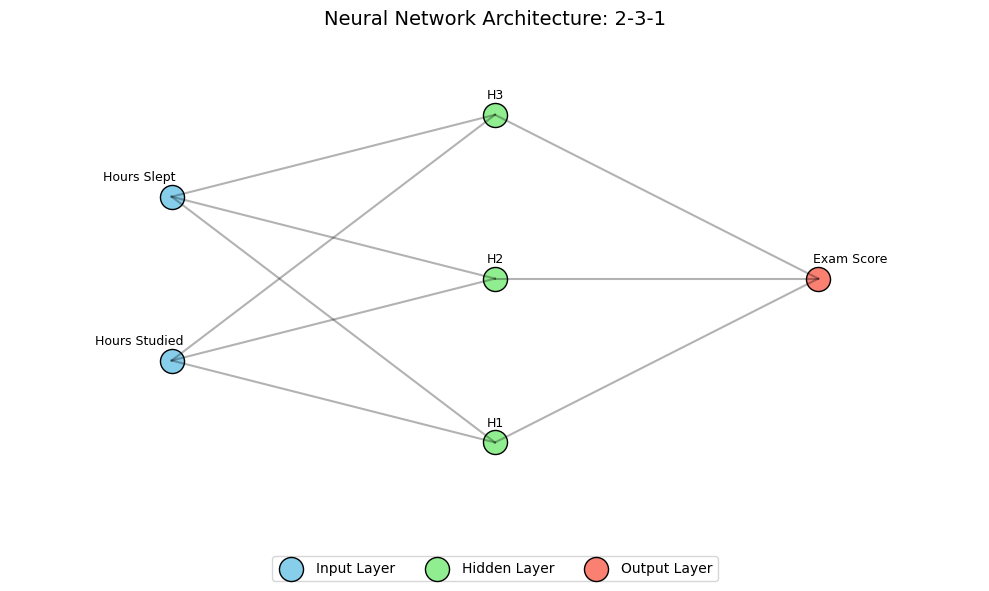

In [6]:
print("\nStep 2: Neural Network Architecture")
print("----------------------------------")

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initialize our neural network with the specified architecture

        Args:
            input_size (int): Number of input features
            hidden_size (int): Number of neurons in the hidden layer
            output_size (int): Number of output values
        """
        # Network architecture
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights with random values
        # The random initialization helps break symmetry and ensures
        # that the neural network can learn diverse features
        self.W1 = np.random.randn(input_size, hidden_size)  # Weights from input to hidden layer
        self.W2 = np.random.randn(hidden_size, output_size) # Weights from hidden to output layer

        # Track loss history for visualization
        self.loss_history = []

    def sigmoid(self, z):
        """
        Sigmoid activation function: transforms any input to a value between 0 and 1

        Args:
            z: Input value or array

        Returns:
            Output of sigmoid function
        """
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        """
        Derivative of sigmoid function: needed for backpropagation

        Args:
            z: Input value or array

        Returns:
            Derivative of sigmoid at z
        """
        sig = self.sigmoid(z)
        return sig * (1 - sig)  # More numerically stable than the original implementation

    def forward(self, X):
        """
        Forward propagation: compute and store intermediate values for backpropagation

        Args:
            X: Input features, shape [n_samples, input_size]

        Returns:
            Predicted output, shape [n_samples, output_size]
        """
        # Step 1: Calculate weighted sum at hidden layer
        self.z1 = np.dot(X, self.W1)

        # Step 2: Apply activation function to get hidden layer activations
        self.a1 = self.sigmoid(self.z1)

        # Step 3: Calculate weighted sum at output layer
        self.z2 = np.dot(self.a1, self.W2)

        # Step 4: Apply activation function to get output
        self.a2 = self.sigmoid(self.z2)

        return self.a2

    def compute_loss(self, y_true, y_pred):
        """
        Compute the mean squared error loss

        Args:
            y_true: True values
            y_pred: Predicted values

        Returns:
            Mean squared error loss
        """
        return 0.5 * np.mean((y_true - y_pred) ** 2)

    def backward(self, X, y, learning_rate):
        """
        Backward propagation: update weights based on error

        Args:
            X: Input features, shape [n_samples, input_size]
            y: True target values, shape [n_samples, output_size]
            learning_rate: Controls how much we adjust weights by

        Returns:
            Current loss value after the update
        """
        m = X.shape[0]  # Number of samples

        # Step 1: Calculate output layer error
        # Error = (predicted - actual) * derivative of activation function
        output_error = (self.a2 - y) * self.sigmoid_derivative(self.z2)

        # Step 2: Calculate hidden layer error
        # Error = (output_error weighted by W2) * derivative of activation function
        hidden_error = np.dot(output_error, self.W2.T) * self.sigmoid_derivative(self.z1)

        # Step 3: Calculate gradients
        # Gradient = error weighted by activations from previous layer
        dW2 = np.dot(self.a1.T, output_error) / m
        dW1 = np.dot(X.T, hidden_error) / m

        # Step 4: Update weights
        # Subtract gradient * learning_rate to minimize loss
        self.W2 -= learning_rate * dW2
        self.W1 -= learning_rate * dW1

        # Calculate loss after the update
        loss = self.compute_loss(y, self.a2)
        self.loss_history.append(loss)

        return loss

    def train(self, X, y, learning_rate, epochs):
        """
        Train the neural network using backpropagation

        Args:
            X: Input features
            y: True target values
            learning_rate: Controls how much we adjust weights
            epochs: Number of complete passes through the training data

        Returns:
            List of loss values during training
        """
        losses = []

        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)

            # Backward pass and update weights
            loss = self.backward(X, y, learning_rate)
            losses.append(loss)

            # Print progress every 100 epochs
            if epoch % 100 == 0 or epoch == epochs - 1:
                print(f"Epoch {epoch}: loss = {loss:.6f}")

        return losses

    def predict(self, X):
        """
        Make predictions with the trained network

        Args:
            X: Input features

        Returns:
            Predicted output
        """
        return self.forward(X)

# Create a visual representation of our network architecture
def visualize_nn_architecture():
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set the positions
    input_layer_pos = np.array([[0, 0], [0, 1]])
    hidden_layer_pos = np.array([[1, -0.5], [1, 0.5], [1, 1.5]])
    output_layer_pos = np.array([[2, 0.5]])

    # Draw neurons as circles
    ax.scatter(input_layer_pos[:, 0], input_layer_pos[:, 1], s=300, c='skyblue', edgecolor='black', label='Input Layer')
    ax.scatter(hidden_layer_pos[:, 0], hidden_layer_pos[:, 1], s=300, c='lightgreen', edgecolor='black', label='Hidden Layer')
    ax.scatter(output_layer_pos[:, 0], output_layer_pos[:, 1], s=300, c='salmon', edgecolor='black', label='Output Layer')

    # Draw connections between layers
    for i in range(len(input_layer_pos)):
        for j in range(len(hidden_layer_pos)):
            ax.plot([input_layer_pos[i, 0], hidden_layer_pos[j, 0]],
                   [input_layer_pos[i, 1], hidden_layer_pos[j, 1]], 'k-', alpha=0.3)

    for i in range(len(hidden_layer_pos)):
        for j in range(len(output_layer_pos)):
            ax.plot([hidden_layer_pos[i, 0], output_layer_pos[j, 0]],
                   [hidden_layer_pos[i, 1], output_layer_pos[j, 1]], 'k-', alpha=0.3)

    # Add labels to neurons
    for i, (x, y) in enumerate(input_layer_pos):
        labels = ["Hours Studied", "Hours Slept"]
        ax.text(x-0.1, y+0.1, labels[i], fontsize=9, ha='center')

    for i, (x, y) in enumerate(hidden_layer_pos):
        ax.text(x, y+0.1, f"H{i+1}", fontsize=9, ha='center')

    for i, (x, y) in enumerate(output_layer_pos):
        ax.text(x+0.1, y+0.1, "Exam Score", fontsize=9, ha='center')

    # Add titles and legends
    ax.set_title("Neural Network Architecture: 2-3-1", fontsize=14)
    ax.set_xlim(-0.5, 2.5)
    ax.set_ylim(-1, 2)
    ax.axis('off')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

    plt.tight_layout()
    plt.show()

# Visualize the network architecture
visualize_nn_architecture()

In [30]:
nn.z1

array([[-0.58511258, -0.12060054, -0.29717343],
       [ 0.3082947 ,  0.2694111 ,  0.77115855],
       [ 0.6165894 ,  0.5388222 ,  1.54231709]])

##### ====================== 3. NEURAL NETWORK TRAINING ======================

In [7]:
print("\nStep 3: Neural Network Training")
print("-----------------------------")

# Initialize our neural network
input_size = 2    # Two features: hours studied and hours slept
hidden_size = 3   # Three neurons in hidden layer
output_size = 1   # One output: predicted exam score

nn = NeuralNetwork(input_size, hidden_size, output_size)

# Print initial weights
print("Initial weights from input to hidden layer (W1):")
print(nn.W1)
print("\nInitial weights from hidden to output layer (W2):")
print(nn.W2)


Step 3: Neural Network Training
-----------------------------
Initial weights from input to hidden layer (W1):
[[ 0.22640218 -1.01087898  1.95285446]
 [-0.14268245  0.76510113 -0.44158492]]

Initial weights from hidden to output layer (W2):
[[ 0.08787896]
 [ 1.55671113]
 [-1.23177217]]


In [28]:
X

array([[ 3,  5],
       [ 5,  1],
       [10,  2]])

In [27]:
X_norm

array([[0.3, 1. ],
       [0.5, 0.2],
       [1. , 0.4]])

In [8]:
# Initial predictions (before training)
initial_predictions = nn.predict(X_norm)
print("\nInitial predictions (before training):")
print(f"Normalized predictions: {initial_predictions.flatten()}")
print(f"Actual normalized scores: {y_norm.flatten()}")


Initial predictions (before training):
Normalized predictions: [0.58346782 0.45405293 0.3796745 ]
Actual normalized scores: [0.75 0.82 0.93]


In [25]:
# Train the network
epochs = 1000
learning_rate = 0.8
print(f"\nTraining for {epochs} epochs with learning rate {learning_rate}...")
losses = nn.train(X_norm, y_norm, learning_rate, epochs)


Training for 1000 epochs with learning rate 0.8...
Epoch 0: loss = 0.001124
Epoch 100: loss = 0.001046
Epoch 200: loss = 0.000978
Epoch 300: loss = 0.000920
Epoch 400: loss = 0.000869
Epoch 500: loss = 0.000825
Epoch 600: loss = 0.000787
Epoch 700: loss = 0.000754
Epoch 800: loss = 0.000725
Epoch 900: loss = 0.000699
Epoch 999: loss = 0.000677


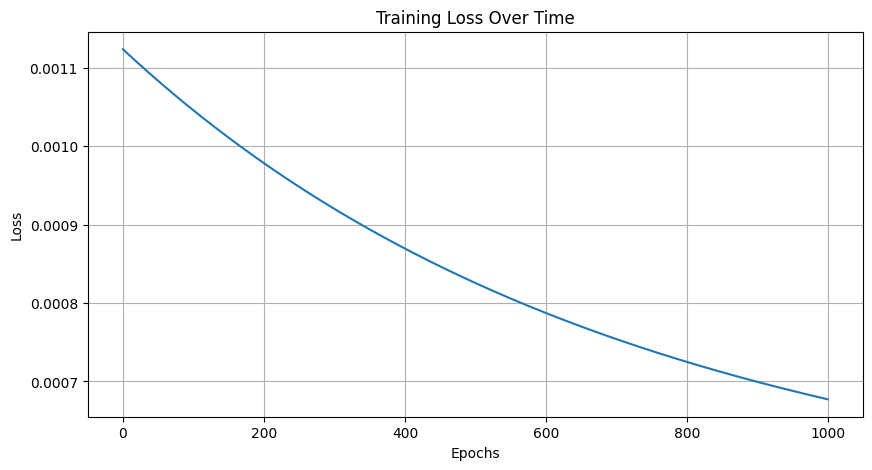

In [26]:
# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

##### ====================== 4. RESULTS AND VISUALIZATION ======================

In [12]:
print("\nStep 4: Results and Visualization")
print("-------------------------------")

# Final predictions
final_predictions = nn.predict(X_norm)

# Convert normalized predictions back to original scale
final_predictions_original = final_predictions * 100

print("Final predictions:")
print(f"Normalized predictions: {final_predictions.flatten()}")
print(f"Original scale predictions: {final_predictions_original.flatten()}")
print(f"Actual scores: {y.flatten()}")


Step 4: Results and Visualization
-------------------------------
Final predictions:
Normalized predictions: [0.86697332 0.81805616 0.82209236]
Original scale predictions: [86.69733195 81.80561579 82.20923574]
Actual scores: [75 82 93]


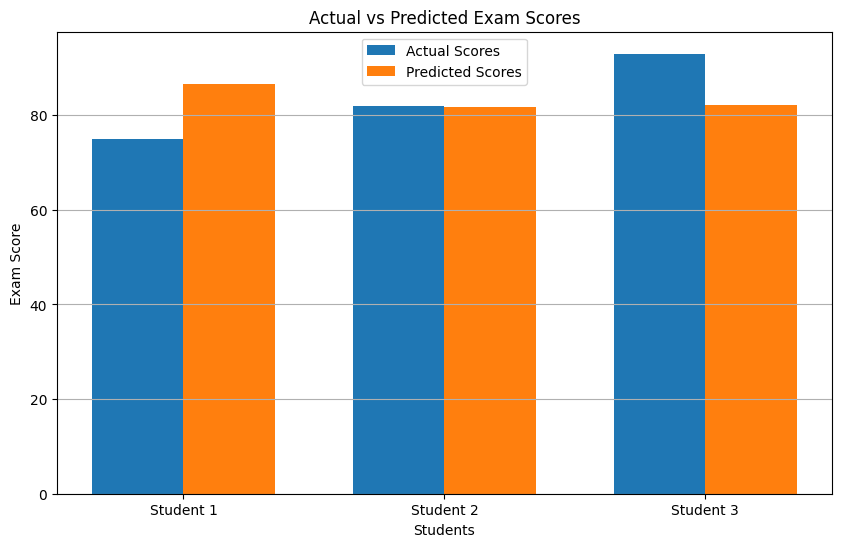

In [13]:
# Visualize the results
plt.figure(figsize=(10, 6))

width = 0.35
x = np.arange(len(y))
plt.bar(x, y.flatten(), width, label='Actual Scores')
plt.bar(x + width, final_predictions_original.flatten(), width, label='Predicted Scores')

plt.xlabel('Students')
plt.ylabel('Exam Score')
plt.title('Actual vs Predicted Exam Scores')
plt.xticks(x + width/2, [f'Student {i+1}' for i in x])
plt.legend()
plt.grid(True, axis='y')
plt.show()

##### ====================== 5. TEST THE MODEL WITH NEW DATA ======================

In [14]:
print("\nStep 5: Testing with New Data")
print("---------------------------")

# Let's test our model with new student data
new_data = np.array([
    [6, 8],    # 6 hours study, 8 hours sleep
    [8, 4],    # 8 hours study, 4 hours sleep
    [4, 7]     # 4 hours study, 7 hours sleep
])

# Normalize the new data using the same scaling as the training data
max_values = np.max(X, axis=0)
new_data_norm = new_data / max_values

# Make predictions
predictions_norm = nn.predict(new_data_norm)
predictions = predictions_norm * 100

print("Predictions for new students:")
for i, (study, sleep) in enumerate(new_data):
    print(f"Student with {study} hours study and {sleep} hours sleep: Predicted score = {predictions[i][0]:.2f}%")



Step 5: Testing with New Data
---------------------------
Predictions for new students:
Student with 6 hours study and 8 hours sleep: Predicted score = 88.69%
Student with 8 hours study and 4 hours sleep: Predicted score = 85.02%
Student with 4 hours study and 7 hours sleep: Predicted score = 88.18%


In [15]:
# A function for manual testing
def test_your_own():
    print("\nNow you can test your own values!")
    try:
        study = float(input("Enter hours of study: "))
        sleep = float(input("Enter hours of sleep: "))

        # Create input array and normalize
        test_data = np.array([[study, sleep]])
        test_data_norm = test_data / np.max(X, axis=0)

        # Predict and scale back to original range
        prediction_norm = nn.predict(test_data_norm)
        prediction = prediction_norm * 100

        print(f"\nPredicted exam score: {prediction[0][0]:.2f}%")
    except ValueError:
        print("Please enter valid numbers!")
    except Exception as e:
        print(f"An error occurred: {e}")

In [16]:
test_your_own()


Now you can test your own values!
Enter hours of study: 4
Enter hours of sleep: 6

Predicted exam score: 87.44%
